In [47]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split


import numpy as np
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [48]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [49]:
dataframe.shape

(4998, 141)

In [6]:
dataframe.to_csv("ecg.csv")

In [7]:
dataframe_1 = dataframe.iloc[0:1, :-1]

In [8]:
dataframe_1

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.25774,0.228077,0.123431,0.925286,0.193137


In [30]:
series = dataframe_1.values
series = series.tolist()


In [31]:
flat_list = [item for sublist in series for item in sublist]

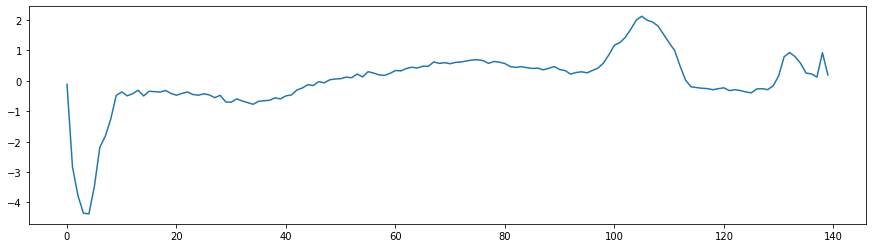

In [34]:
plt.figure(figsize = (15, 4))
plt.plot(flat_list)
plt.show()

In [38]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

In [39]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

### Build the model

In [42]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [43]:
autoencoder.compile(optimizer='adam', loss='mae')

In [44]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 1s 37ms/step - loss: 0.7652 - val_loss: 0.7132
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7615 - val_loss: 0.7085
Epoch 3/20
5/5 [==============================] - 0s 9ms/step - loss: 0.7522 - val_loss: 0.6982
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.7329 - val_loss: 0.6801
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 0.7005 - val_loss: 0.6534
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.6557 - val_loss: 0.6209
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6055 - val_loss: 0.5898
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.5624 - val_loss: 0.5676
Epoch 9/20
5/5 [==============================] - 0s 7ms/step - loss: 0.5330 - val_loss: 0.5535
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 0.5150 - val_loss: 0.5448
Epoch 11/20
5/5 [=====================

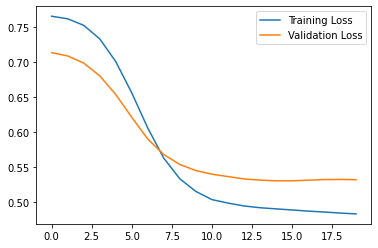

In [45]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

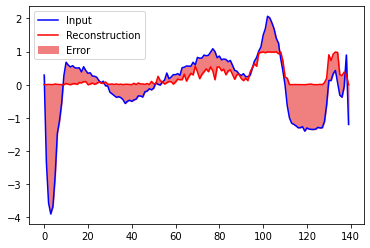

In [46]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()